In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [6]:
N = 100
D = 2

X = np.random.randn(N, D)
bias = np.array([[1] * N]).T
Xb = np.concatenate((bias, X), axis=1)
weights = np.random.randn(D + 1)
z = Xb.dot(weights)

def sigmoid(z):
    return 1 / (1 * np.exp(-z))

print ('Sigmoid: {}'.format(z))

Sigmoid: [-1.53463708  1.22466314  0.08977366  1.6948953   0.35769517 -0.17957805
 -1.07011713  0.50176436  2.08720148  1.81927185 -0.27601426 -1.22774129
  0.3446844  -2.04135447  0.5018953   0.44653382 -0.37143868  0.3264095
  1.55165447 -0.4689317  -0.87847111 -0.01977776 -0.63777571  2.04336821
  1.07811124 -1.2857023  -0.01516605 -0.15708385  1.29844971 -0.35112519
 -0.21557761  0.34747144 -1.15486872 -1.83369699  0.16345539  0.60382836
 -2.77680802  0.38810184 -0.18310433 -1.26303315 -0.32910958 -2.00401072
 -0.99034912  0.48627381 -1.17794148  0.09447923  0.85451711 -0.71459438
  2.00247459  1.92156129 -0.51269943 -1.35357974  0.96083274  0.68200606
  1.32350831 -1.03343903 -1.00993295 -1.35176957  0.37750561  2.8388832
  0.31174932 -1.73269141 -0.12268527  1.15029433 -1.16836    -0.57660598
  1.78812395  3.72420681  0.073798   -0.07004561  1.13758108  1.18816889
 -2.34277615 -0.54382814 -0.39744979 -0.21849286  0.21175426  0.30729775
 -0.73302327  0.02005364  1.1850147  -1.3129

In [7]:
# eCommerce project

def get_data():
    """
    Reading in the CSV file, and then proceed to perform 
    normalization on some variables and one-hot encoding
    on some features
    """
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    print(df.columns)
    
    # Normalization on products viewed and visit duration
    X[:, 1] = (X[:, 1] - np.average(X[:, 1])) / np.std(X[:, 1])
    X[:, 2] = (X[:, 2] - np.average(X[:, 2])) / np.std(X[:, 2])
    
    # Handling categorical value (time of day)
    N, D = X.shape
    new_X = np.zeros((N, D + 3))
    new_X[:, 0:(D - 1)] = X[:, 0:(D - 1)]
    
    for n in range(N):
        t = int(X[n, D - 1])
        new_X[n, t + D - 1] = 1
        
    return new_X, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [8]:
X, Y = get_binary_data()

dimension = X.shape[1]
weights = np.random.randn(dimension)
bias = 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, weights, bias):
    return sigmoid(X.dot(weights) + bias)

prob_y_given_x = forward(X, weights, bias)
predictions = np.round(prob_y_given_x)

def error_rate(predicted, actual):
    return np.mean(predicted == actual)

print('Score: {}'.format(error_rate(predictions, Y)))

Index(['is_mobile', 'n_products_viewed', 'visit_duration',
       'is_returning_visitor', 'time_of_day', 'user_action'],
      dtype='object')
Score: 0.3065326633165829


In [9]:
# Cross-entropy
N = 100
D = 2

np.random.seed(40)

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

def cross_entropy_error(actual, predicted):
    total_error = 0
    for i in range(N):
        if actual[i] == 1:
            total_error -= np.log(predicted[i])
        else:
            total_error -= np.log(1 - predicted[i])
    return total_error

cross_entropy_error(T, Y)

92.465898895446045

In [10]:
weights = np.array([0, 4, 4])
z = Xb.dot(weights)
Y = sigmoid(z)

cross_entropy_error(T, Y)

0.094873631707782333

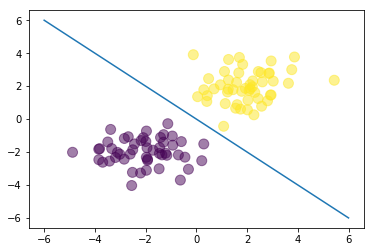

In [11]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)

In [12]:
# Batch gradient descent
N = 100
D = 2

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

learning_rate = 0.1

for _ in range(100):
    if _ % 10 == 0:
        print(cross_entropy_error(T, Y))
    weights += learning_rate * Xb.T.dot(T - Y)
    Y = sigmoid(Xb.dot(weights))
    
print('Final weight: {}'.format(weights))

177.918685405
2.06028112936e-06
2.06027364599e-06
2.06026616252e-06
2.06025867894e-06
2.06025119535e-06
2.06024371188e-06
2.0602362284e-06
2.06022874504e-06
2.0602212619e-06
Final weight: [ -0.84027878  11.82857988  12.60348077]


Index(['is_mobile', 'n_products_viewed', 'visit_duration',
       'is_returning_visitor', 'time_of_day', 'user_action'],
      dtype='object')
iteration 0 train cost 1.0584621140051924 test cost 0.9923897258384159
iteration 1000 train cost 0.106927450778181 test cost 0.26859840992918094
iteration 2000 train cost 0.0973644698490694 test cost 0.281620291033581
iteration 3000 train cost 0.09425082463427127 test cost 0.2913989689555589
iteration 4000 train cost 0.09284197725690134 test cost 0.29877842693072665
iteration 5000 train cost 0.09210604163277276 test cost 0.30448317834028465
iteration 6000 train cost 0.0916886367739954 test cost 0.3089703247963599
iteration 7000 train cost 0.09143897714807205 test cost 0.31254574037830896
iteration 8000 train cost 0.09128405877073989 test cost 0.31542321330636863
iteration 9000 train cost 0.09118533535599288 test cost 0.31775710707649446
Final training accuracy: 0.9748743718592965
Final test accuracy: 0.9597989949748744


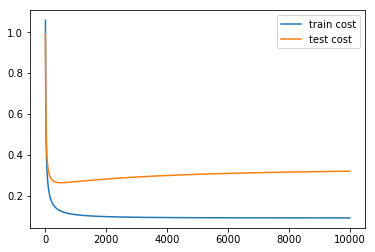

In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)

D = X.shape[1]
weights = np.random.randn(D)
bias = 0

def cross_entropy(actual, prob_Y):
    return -np.mean(actual * np.log(prob_Y) + (1 - actual) * np.log(1 - prob_Y))

train_cost_list = []
test_cost_list = []
learning_rate = 0.001

for _ in range(10000):
    train_prediction = forward(X_train, weights, bias)
    test_prediction = forward(X_test, weights, bias)
    
    train_cost = cross_entropy(y_train, train_prediction)
    test_cost = cross_entropy(y_test, test_prediction)
    
    train_cost_list.append(train_cost)
    test_cost_list.append(test_cost)
    
    weights -= learning_rate * X_train.T.dot(train_prediction - y_train)
    bias -= learning_rate * (train_prediction - y_train).sum()
    
    if _ % 1000 == 0:
        print('iteration {} train cost {} test cost {}'.format(_, train_cost, test_cost))

print('Final training accuracy: {}'.format(error_rate(np.round(train_prediction), y_train)))
print('Final test accuracy: {}'.format(error_rate(np.round(test_prediction), y_test)))

plt.plot(train_cost_list, label='train cost')
plt.plot(test_cost_list, label='test cost')
plt.legend()

In [19]:
# Batch gradient descent with L2 regularization
N = 100
D = 2

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

learning_rate = 0.1
regularization = 0.1

for _ in range(100):
    if _ % 10 == 0:
        print(cross_entropy_error(T, Y))
    weights += learning_rate * (Xb.T.dot(T - Y) - 0.1 * weights)
    Y = sigmoid(Xb.dot(weights))
    
print('Final weight: {}'.format(weights))

13.7683793961
1.1173357116
0.967843159694
0.894918053842
0.8526099665
0.826091950847
0.808790906723
0.79724125598
0.789422036841
0.784080631788
Final weight: [ 0.11206524  3.37058035  2.06552938]


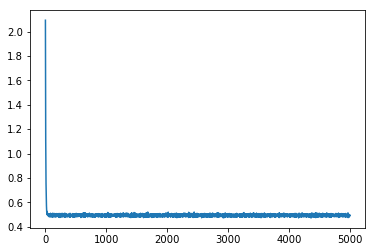

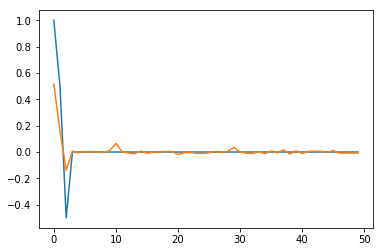

In [33]:
# L1 regularization

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10
true_weights = np.array([1, 0.5, -0.5] + [0] * (D - 3))
Y = np.round(sigmoid(X.dot(true_weights) + np.random.randn(N) * 0.5))

costs = []
weights = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
regularization = 10.0

for t in range(5000):
    Y_hat = sigmoid(X.dot(weights))
    delta = Y_hat - Y
    weights -= learning_rate * (X.T.dot(delta) + regularization * np.sign(weights))
    
    cost = -(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)).mean() + regularization * np.abs(weights).mean()
    costs.append(cost)

plt.plot(costs)
plt.show()

plt.plot(true_weights, label='True weights')
plt.plot(weights, label='Predicted weights')